Plot 1: This plot shows the distribution of car break-ins in San Francisco. Shown are data between 2003-2018 with a total of ~230000 data points. Also shown is the poverty level (percentage of population below poverty level). In some areas one can see a clear correlation between the two

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from matplotlib.colors import LogNorm
import time
import datetime
import re
from utilities import CensusTractFinder
from utilities import AFFData
from utilities import Geometry

In [2]:
fname = 'Car_Break_Ins_Clean.csv'
data = pd.read_csv(fname, quotechar='"')

dateformat = '%m/%d/%Y'
ref_date = time.mktime(time.strptime('01/01/2018', dateformat))
p_date = re.compile('(\d{2})/(\d{2})/(\d{4})')
p_time = re.compile('(\d{2}):(\d{2})')

In [3]:
t = []
w = []
m = []
for entry in np.array(data[['Date', 'Time']].as_matrix().astype(str)):
    weekday = datetime.datetime.strptime(entry[0], dateformat).weekday()
    
    date_matches = p_date.match(entry[0])
    time_matches = p_time.match(entry[1])
    
    if int(date_matches.group(1)) == 2 and int(date_matches.group(2)) == 29:
        continue
    
    month = time.mktime(time.strptime('%02i/%02i/2018'%(int(date_matches.group(1)), int(date_matches.group(2))), dateformat))
    
    time_of_day = (float(time_matches.group(1))*60 + float(time_matches.group(2)))/60
    time_of_year = (time_of_day + (month - ref_date)/3600)/24
    time_of_week = (time_of_day + weekday*24)/24

    t.append(time_of_day)
    w.append(weekday)
    m.append(time_of_year)

In [4]:
loc = np.array(data[['X', 'Y']].as_matrix().astype(float))

In [5]:
geom = Geometry()
SF_boundaries_x, SF_boundaries_y = geom.GetSFBoundaries()

In [48]:
cs = CensusTractFinder()
cs.LoadData()

In [49]:
aff_data = AFFData()

Problem with census tract 9901
Problem with census tract 9804.01


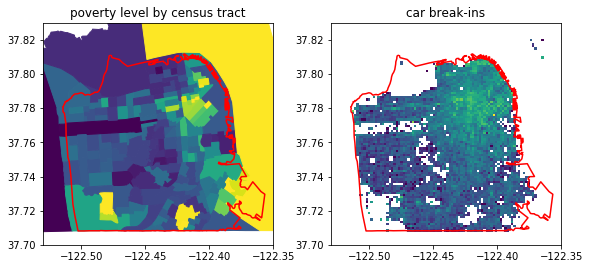

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

ax2.hist2d(loc[:,0], loc[:,1],bins=(100,100),range=[[-122.53,-122.35],[37.7,37.83]], norm=LogNorm())
ax2.plot(SF_boundaries_x, SF_boundaries_y, color='red')

ax1.plot(SF_boundaries_x, SF_boundaries_y, color='red')

cmap = plt.cm.get_cmap('viridis', 100)

for dt in cs.GetCensusTracts():
    if float(census_tract) > 9004:
        continue
    
    x, y = cs.GetCoordinates(dt)
    p = aff_data.GetPovertyForCensusTract(dt)/100*3
    ax1.fill(x, y, color=cl.rgb2hex(cmap(p)[:3]))

ax1.set_title('poverty level by census tract')
ax2.set_title('car break-ins')

ax1.set_xlim([-122.53,-122.35])
ax1.set_ylim([37.7,37.83])

fig.subplots_adjust(left=0.05, right=0.95, bottom=0.11, top=0.88, wspace=0.25, hspace=0.2)

plt.show()